In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from copy import deepcopy

## Integrate-and-fire neuron model

This is one of the simplest models of neuron behavior. It omits all the intricacies of what goes on electrochemically inside the neuron's body, and simply attempts to capture the basic 'accumulate till a threshold and then fire and let go of all the accumulation' aspect of a neuron's activity

$$\frac{dv}{dt} = \frac{(v_0 - v)}{\tau},$$

where $v$ is the membrane voltage of the neuron, and $\tau$ is a timescale factor.

In [ ]:
v0 = 1
tau = 10*ms
eqs = '''
dv/dt = (v0-v)/tau : 1
'''

In [ ]:
G = NeuronGroup(1, eqs, threshold='v>0.8', reset='v = 0', method='exact')
M = StateMonitor(G, 'v', record=True)
spikemon = SpikeMonitor(G)

Text(0, 0.5, 'v')

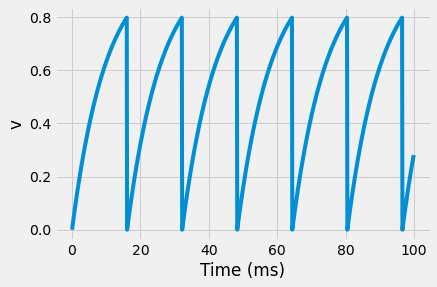

In [ ]:
run(100*ms)
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v')

## Hopfield network model

In this simplified Hopfied model, each neuron can only take values +1 or -1. The network stores pixel patterns, and attempts to retrieve them given some cue in the form of a part of the original pattern used to set an initial state $S_i(t=0)$ for every neuron in the network. The network activation of all the neurons evolves as follows

$$S_i(t+1) = sgn\left(\sum_j{w_{ij} S_j(t)}\right), $$

where the weight of every synaptic connection is calculated as,

$$w_{ij} = \frac{1}{N} \sum_{\mu}{p_i^\mu p_j^\mu}, $$

where in turn, $N$ is the number of neurons, and $p_i^\mu$ is the state of the $i^{th}$ neuron for encoding pattern $\mu$.

The code below is taken from this [link](https://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/hopfield-network.html). Follow the accompanying exercises to be better prepared for your assignment. Remember to install all needed libraries before trying to run it.

In [ ]:
%pip install neurodynex3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 2.2 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 71.0.4
    Uninstalling setuptools-71.0.4:
      Successfully uninstalled setuptools-71.0.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: matplotlib
    Found 

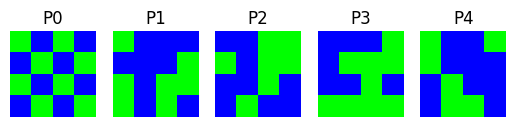

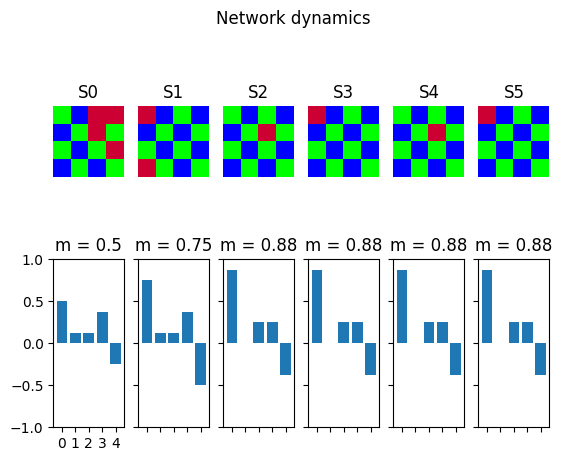

In [ ]:
%matplotlib inline
from neurodynex3.hopfield_network import network, pattern_tools, plot_tools

pattern_size = 4

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)
# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create a checkerboard pattern and add it to the pattern list
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]

# add random patterns to the list
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=4, on_probability=0.5))
plot_tools.plot_pattern_list(pattern_list)
# how similar are the random patterns and the checkerboard? Check the overlaps
overlap_matrix = pattern_tools.compute_overlap_matrix(pattern_list)
#plot_tools.plot_overlap_matrix(overlap_matrix)

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net.store_patterns(pattern_list)

# create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=4)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring()

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")


## Our own Hopfield network model

You will write your own code to build a Hopfield network. I am leaving sample expected results below as a guide.

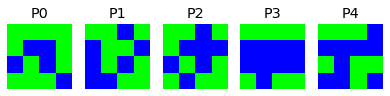

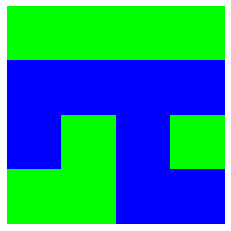

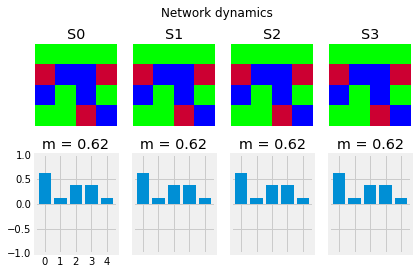

In [ ]:
plist = get_patterns(4,5)
#plot_tools.plot_pattern_list(plist)

cue = deepcopy(plist)

S = perturb_pattern(cue[0],3)
wghts = calculate_weights(plist, pattern_size)

state_list =[S]
#state_list.append(S)
#print(state_list)
#plot_tools.plot_pattern(S)
for i in range(3):
    state_list.append(network_evolution(S,wghts))
#    state_list.append(S)

plot_tools.plot_pattern_list(plist)
#print(state_list[0])
plot_tools.plot_pattern(state_list[0])
plot_tools.plot_state_sequence_and_overlap(state_list, plist, reference_idx=0, suptitle="Network dynamics")

## Assignment 1

Q1. Can you write you own Hopfield network model that works more or less like the one simulated above? (20 points)

Q2. Run the model with different parameters to figure out how the model's capacity to retrieve the correct pattern in response to a cue deteriorates as a function of
(a) the informativeness of the cue
(b) the number of other patterns stored in the network
(c) the size of the network

```
# This is formatted as code
```



Present your answers with plots and/or math. (20 points)

Q3. Can you write a function that converts MNIST digit [data](https://gitlab.com/datapythonista/mnist) to the sort of patterns used in this simulation? (20 points)

Q4. Can you write an MNIST classifier using the Hopfield network?. Can you characterize its performance using F-score, and compare with [classical](https://github.com/ksopyla/svm_mnist_digit_classification) and [deep](https://github.com/hwalsuklee/tensorflow-mnist-cnn) supervised learning methods? Remember that you can always use multiple samples of the same digit even for the Hopfield network classifier. Summarize your sense of the merits and demerits of using a Hopfield network as a classifier (40 points)

# My answers:

# Question 1. Creating my own Hopfield network:

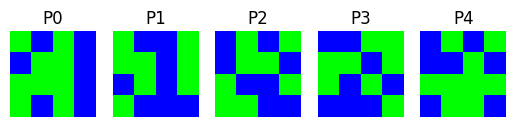




initial_state_with_noise:


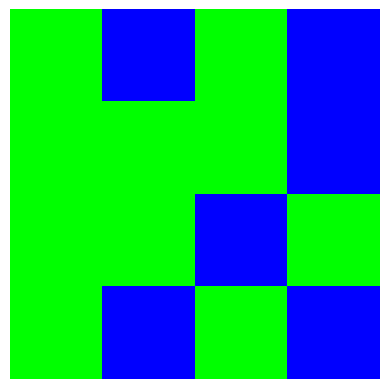

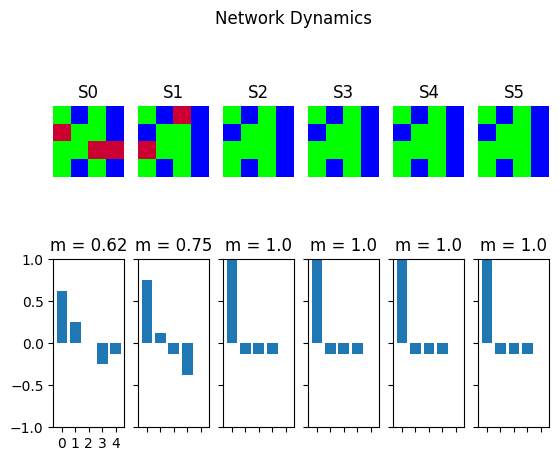

In [ ]:
import numpy as np
from copy import deepcopy
from neurodynex3.hopfield_network import plot_tools

size = 4

#function to generate a list of patterns
def get_patterns(size, n):
    list_of_patterns = []
    for i in range(n):
        one_pattern = np.zeros((size, size), dtype=int)
        for j in range(size):
            for k in range(size):
                if np.random.rand() > 0.5:
                  one_pattern[j, k] = 1
                else:
                  one_pattern[j, k] = -1
        list_of_patterns.append(one_pattern)
    return list_of_patterns

#flips n patterns in the given pattern
def perturb_pattern(pattern, n):
    perturbed_pattern = pattern.copy()
    flat_pattern = perturbed_pattern.flatten()
    num_elements = flat_pattern.size

    index = []
    while len(index) < n:
        i = int(np.random.rand() * num_elements)
        if i not in index:
            index.append(i)
    for j in index:
        flat_pattern[j] *= -1

    perturbed_pattern = flat_pattern.reshape(pattern.shape)
    return perturbed_pattern

def calculate_weights(list_of_patterns, size):
    N = size ** 2
    W = np.zeros((N, N))

    for i in list_of_patterns:
        pattern_flat = i.flatten()
        for j in range(N):
            for k in range(N):
                W[j, k] += pattern_flat[j] * pattern_flat[k]

    np.fill_diagonal(W, 0)
    return W / len(list_of_patterns)

#calculates the next step from present step and weights
def network_evolution(present_state, weights):
    present_state_flat = present_state.flatten()
    next_state_flat = np.zeros_like(present_state_flat)

    for i in range(len(present_state_flat)):
        sum = 0
        for j in range(len(present_state_flat)):
            sum += weights[i, j] * present_state_flat[j]
        next_state_flat[i] = 1 if sum > 0 else -1

    next_state = next_state_flat.reshape(present_state.shape)
    return next_state

list_of_patterns = get_patterns(size, 5)
cue = deepcopy(list_of_patterns)
initial_state_with_noise = perturb_pattern(cue[0], 3)

weights = calculate_weights(list_of_patterns, size)

state_list = [initial_state_with_noise]


state = initial_state_with_noise
for _ in range(5):
    state = network_evolution(state, weights)
    state_list.append(state)


plot_tools.plot_pattern_list(list_of_patterns)

print("\n\n")
print("initial_state_with_noise:")
plot_tools.plot_pattern(state_list[0])

plot_tools.plot_state_sequence_and_overlap(state_list, list_of_patterns, reference_idx=0, suptitle="Network Dynamics")


# Question 2.a. How informativeness of the cue affects model's capacity to retrieve the correct pattern:

I am doing it by checking for different number of flips and keeping other things constant.

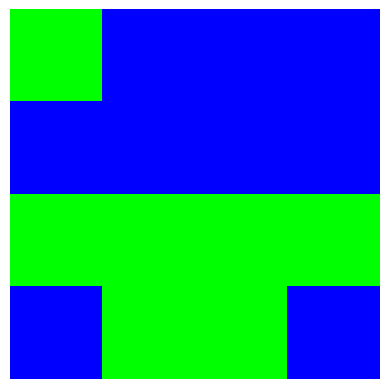

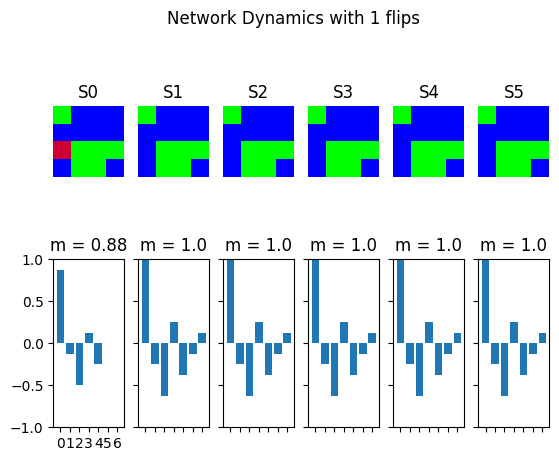

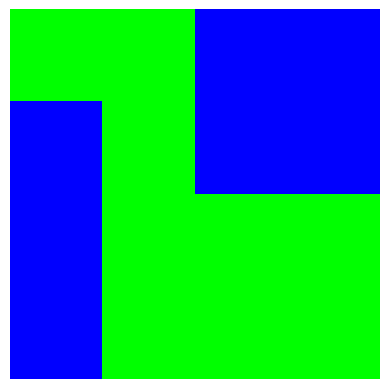

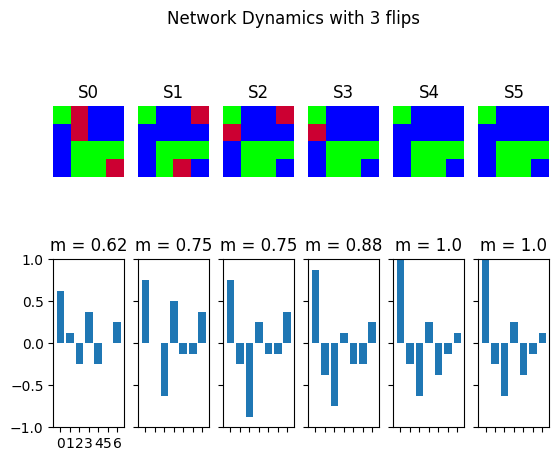

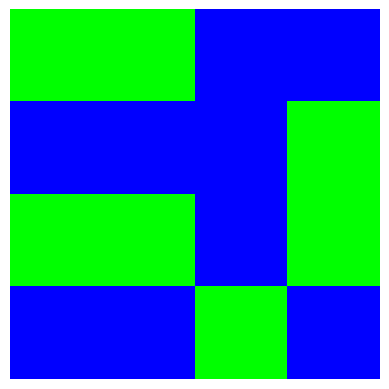

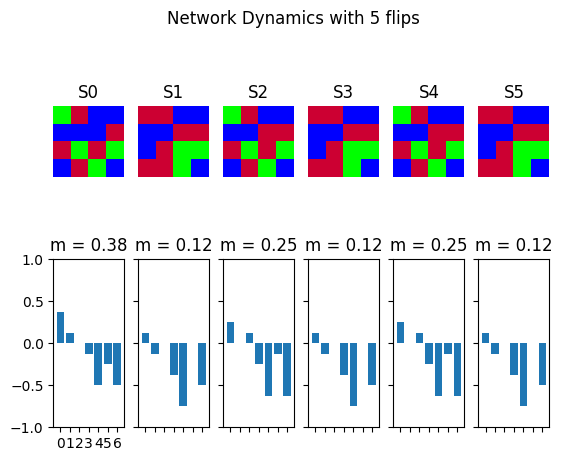

In [ ]:
flip_counts = [1, 3, 5]
for flips in flip_counts:
    initial_state_with_noise = perturb_pattern(cue[0], flips)
    state_list = [initial_state_with_noise]
    state = initial_state_with_noise
    for _ in range(5):
        state = network_evolution(state, weights)
        state_list.append(state)
    plot_tools.plot_pattern(state_list[0])
    plot_tools.plot_state_sequence_and_overlap(state_list, list_of_patterns, reference_idx=0, suptitle=f"Network Dynamics with {flips} flips")


For 1 flip, the model is able to retrieve the original pattern in just 1 step. But as i increase the number of flips, it is taking considerably higher number of steps. So, higher the flips, the lower the capacity of the model to retrieve the original pattern. <br><br>
This makes sense cause for given number of patterns, higher the similarity of a pattern with the initial noisy state, the easier it becomes for the model to converge and vice versa.

# Question 2.b. How the number of other patterns stored in the network affects model's capacity to retrieve the correct pattern:

I am doing it by checking by storing different number of patterns and keeping other things constant

Storing  3  patterns


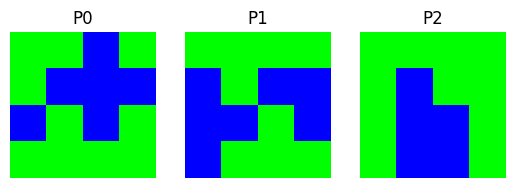

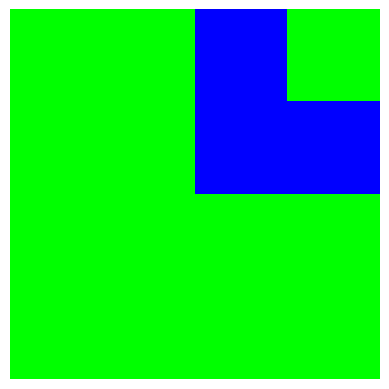

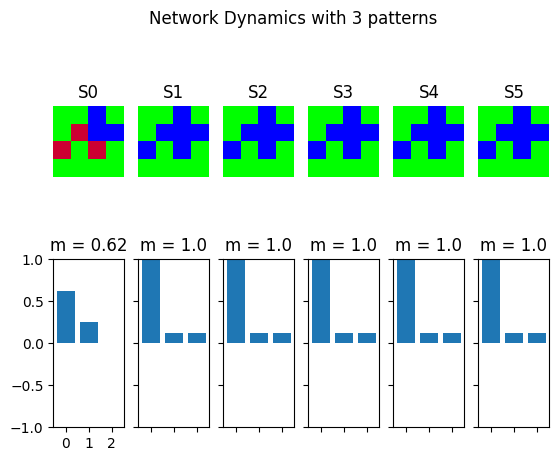





Storing  5  patterns


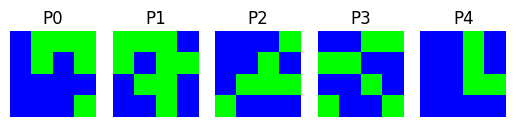

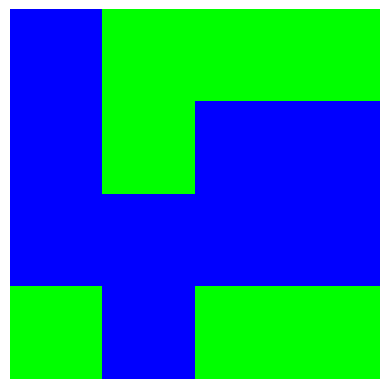

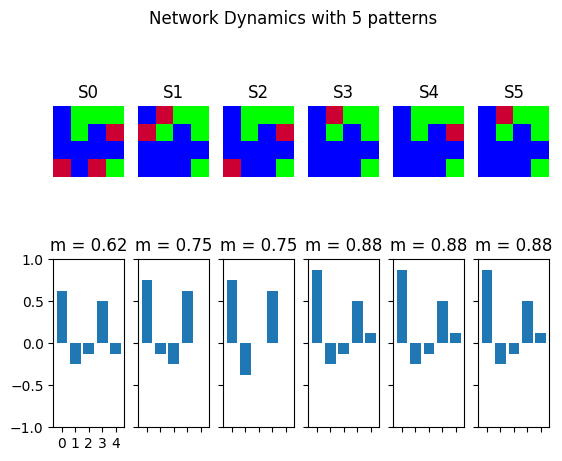





Storing  7  patterns


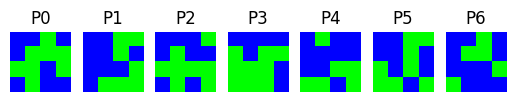

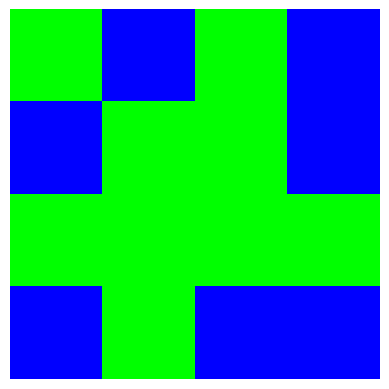

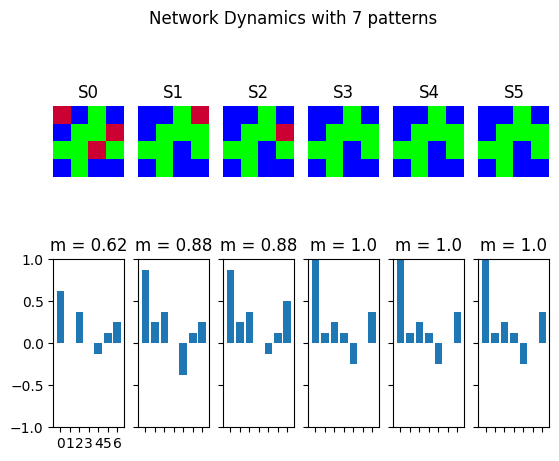

In [ ]:
pattern_counts = [3, 5, 7]
for count in pattern_counts:
    list_of_patterns = get_patterns(size, count)
    cue = deepcopy(list_of_patterns)
    initial_state_with_noise = perturb_pattern(cue[0], 3)
    weights = calculate_weights(list_of_patterns, size)
    state_list = [initial_state_with_noise]
    state = initial_state_with_noise
    for _ in range(5):
        state = network_evolution(state, weights)
        state_list.append(state)

    print("Storing ",count," patterns")
    plot_tools.plot_pattern_list(list_of_patterns)
    plot_tools.plot_pattern(state_list[0])
    plot_tools.plot_state_sequence_and_overlap(state_list, list_of_patterns, reference_idx=0, suptitle=f"Network Dynamics with {count} patterns")
    print("\n\n\n")

It is seen that on storing higher number of patterns decreases the model capacity to retrieve the original pattern.
<br><br>
It is also kinda intuitive because the model can get confused between which pattern to choose for similarity calculation when we have higher number of patterns.

# Question 2.c. How size of the network affects model's capacity to retrieve the correct pattern:

I am doing it by checking for different number of weight sizes and keeping other things constant.

For network with  1  neurons or  1 x 1  weights


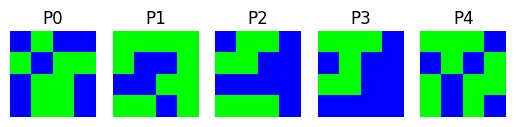

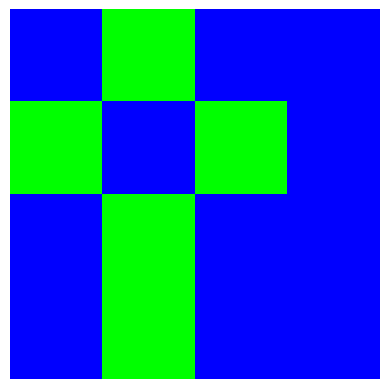

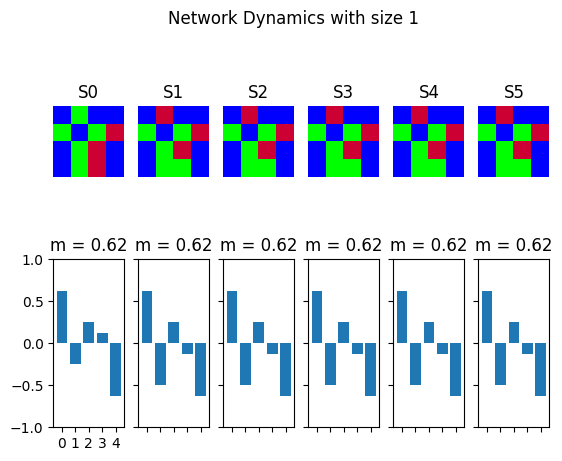





For network with  2  neurons or  2 x 2  weights


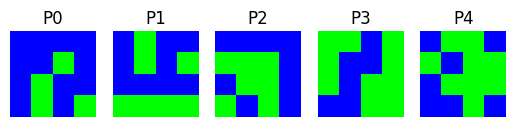

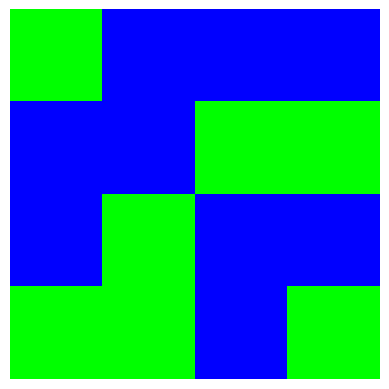

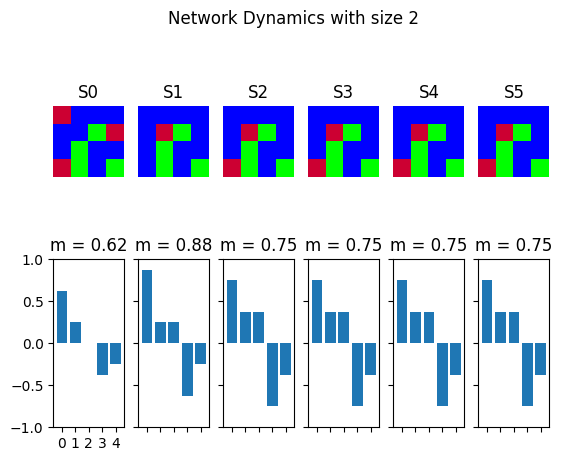





For network with  4  neurons or  4 x 4  weights


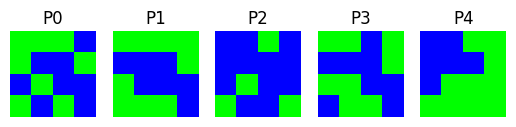

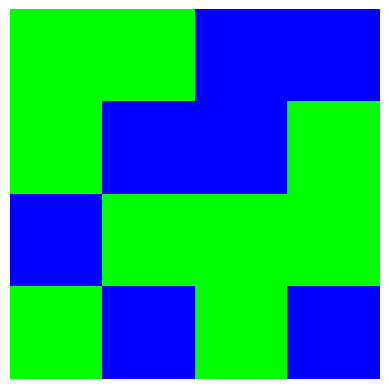

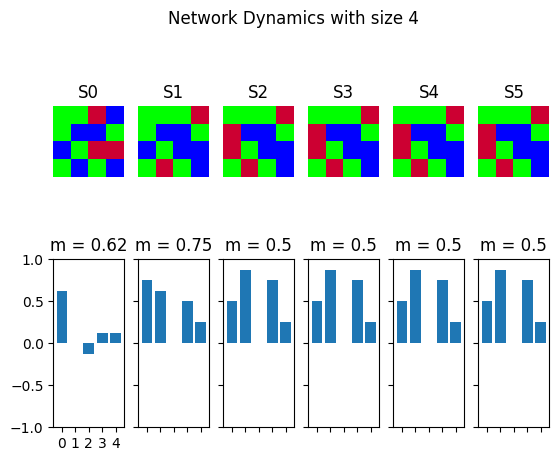





For network with  8  neurons or  8 x 8  weights


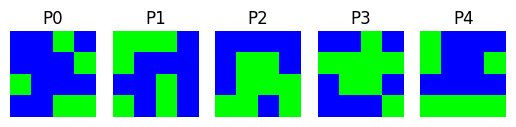

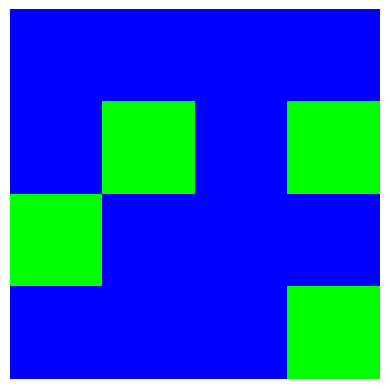

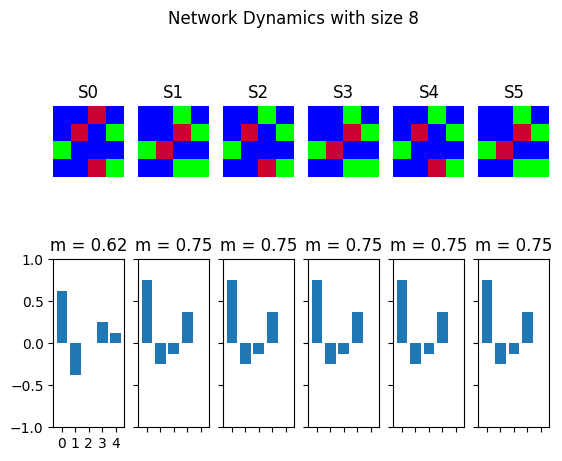





For network with  16  neurons or  16 x 16  weights


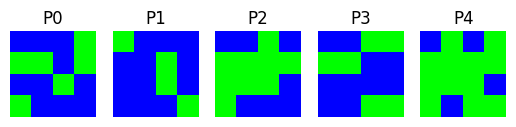

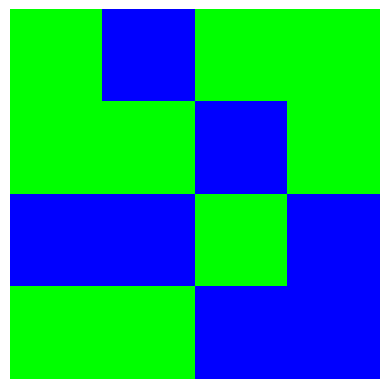

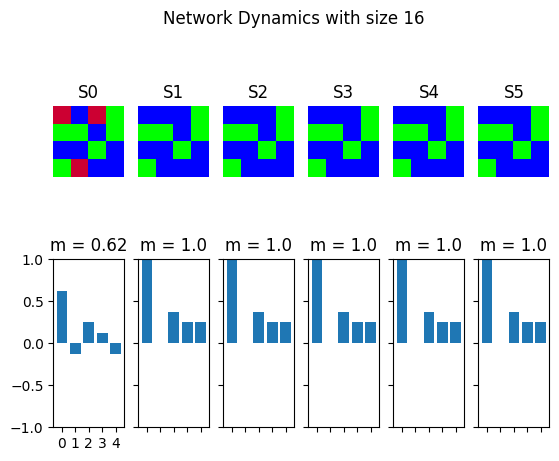





For network with  32  neurons or  32 x 32  weights


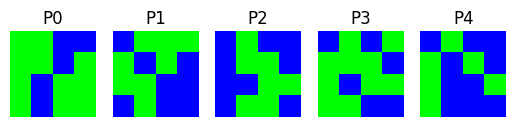

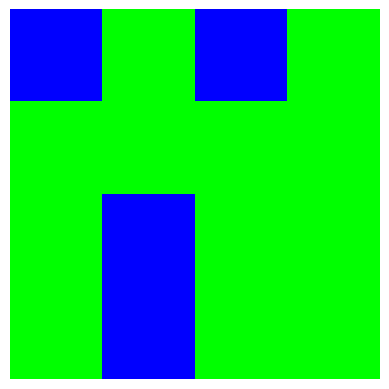

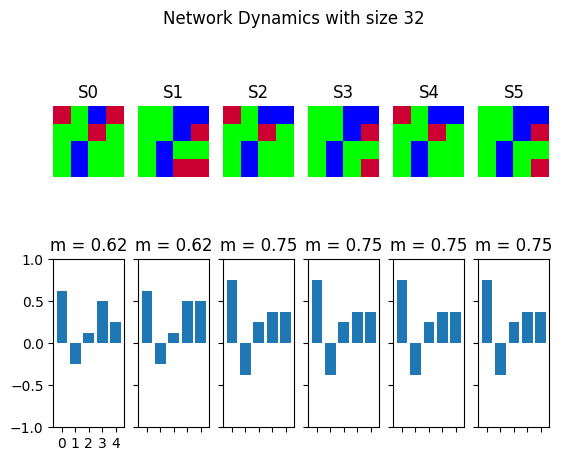





For network with  64  neurons or  64 x 64  weights


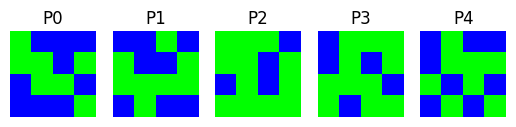

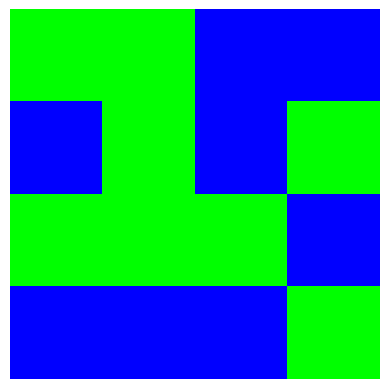

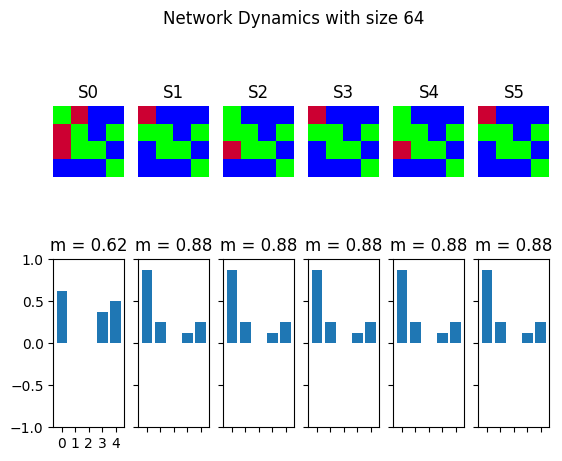

In [ ]:
sizes = [1, 2, 4, 8, 16, 32, 64]

for size in sizes:
    list_of_patterns = get_patterns(4, 5)
    cue = deepcopy(list_of_patterns)
    initial_state_with_noise = perturb_pattern(cue[0], 3)
    weights = calculate_weights(list_of_patterns, 4)

    state_list = [initial_state_with_noise]
    state = initial_state_with_noise
    for _ in range(5):
        state = network_evolution(state, weights)
        state_list.append(state)

    print("For network with ",size," neurons or ", size, "x",size, " weights")
    plot_tools.plot_pattern_list(list_of_patterns)
    plot_tools.plot_pattern(state_list[0])
    plot_tools.plot_state_sequence_and_overlap(state_list, list_of_patterns, reference_idx=0, suptitle=f"Network Dynamics with size {size}")
    print("\n\n\n")

Larger networks may improve pattern retrieval under certain conditions (up till certain number of neurons) but on increasing more neurons from the "optimal" number of neurons might also introduce new complexities.
<br><br>
In above case (that specific instance), network of size 16 performed best (could retrieve the original pattern in just 1 step) which is better than both the smaller (1,2,4,8) and bigger networks (32,64).



# Question 3. Function that converts MNIST digit data to patterns

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In matrix representation:
[[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1  1  1 -1
  -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1
  -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1

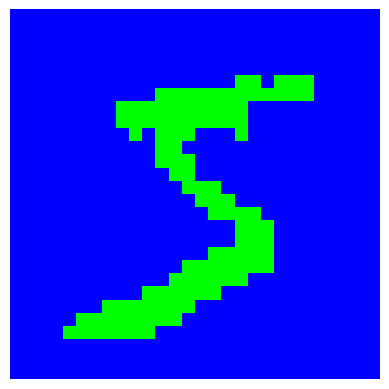

Original image: 


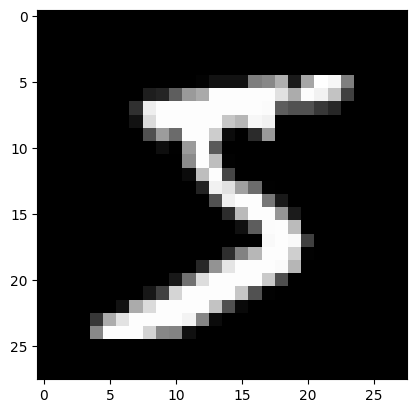

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

def generate_pattern(image, threshold):
    normalized_image = image / 255.0
    pattern = np.where(normalized_image > threshold, 1, -1)
    print("In matrix representation:")
    print(pattern)
    print("\n\n\n Plotting the pattern:")
    plot_tools.plot_pattern(pattern)

mnist = fetch_openml('mnist_784')

example_image = mnist.data.iloc[0].values.reshape(28, 28)
generate_pattern(example_image, threshold=0.5)

print("Original image: ")
plt.imshow(example_image, cmap='gray')

# Question 4. Hopfield network classifier for MNIST data

In [44]:
import numpy as np
from keras.datasets import mnist
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.transform import resize

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# def select_subset(images, labels, subset_size):
#     indices = np.random.choice(range(images.shape[0]), subset_size, replace=False)
#     return images[indices], labels[indices]

#adaptive thresholding
def adaptive_binarize(images):
    adaptive_thresh = np.mean(images, axis=(1, 2), keepdims=True)
    return np.where(images > adaptive_thresh, 1, -1)

#resize, binarize, and then flatten
def preprocess_images(images, size):
    images_resized = np.array([resize(image, (size, size), anti_aliasing=True) for image in images])
    images_binarized = adaptive_binarize(images_resized)
    return images_binarized.reshape((images_binarized.shape[0], -1))

def train(train_images, train_labels, size):
    n_pixels = size * size
    W = np.zeros((n_pixels, n_pixels))
    averaged_patterns = []

    for i in range(10):
        digit_indices = np.where(train_labels == i)[0]
        selected_samples = train_images[digit_indices]

        averaged_pattern = np.mean(selected_samples, axis=0)
        averaged_patterns.append(averaged_pattern[:n_pixels])

        W += np.outer(averaged_pattern[:n_pixels], averaged_pattern[:n_pixels])

    #no self-connection
    np.fill_diagonal(W, 0)
    averaged_patterns = np.array(averaged_patterns)
    W /= np.max(np.abs(W))

    return W, averaged_patterns

def classify(image, W, averaged_patterns, num_iterations=10):
    state = image.copy()
    n_pixels = image.shape[0]
    for _ in range(num_iterations):
        for i in range(n_pixels):
            state[i] = np.sign(np.dot(W[i], state))

    similarities = [np.dot(state, pattern) for pattern in averaged_patterns]
    predicted_class = np.argmax(similarities)
    return predicted_class

#trying with different pattern sizes as seen on the forum
pattern_sizes = [28, 18, 14, 10]
subset_size = 50000

for size in pattern_sizes:
    print(f"\nExperimenting with pattern size: {size}x{size}")

    # train_images_subset, train_labels_subset = select_subset(train_images, train_labels, subset_size)
    # test_images_subset, test_labels_subset = select_subset(test_images, test_labels, subset_size)
    train_images_preprocessed = preprocess_images(train_images, size)
    test_images_preprocessed = preprocess_images(test_images, size)

    W, averaged_patterns = train(train_images_preprocessed, train_labels, size)

    predictions = []
    for i in range(len(test_images_preprocessed)):
        prediction = classify(test_images_preprocessed[i], W, averaged_patterns)
        predictions.append(prediction)
    f1 = f1_score(test_labels, predictions, average='macro')
    print("F1 Score:", f1)
    print("Accuracy:", accuracy_score(test_labels, predictions))
    print("\n\n\n")



Experimenting with pattern size: 28x28
F1 Score: 0.0203861697350696
Accuracy: 0.1135





Experimenting with pattern size: 18x18
F1 Score: 0.0183304568989009
Accuracy: 0.1009





Experimenting with pattern size: 14x14
F1 Score: 0.0183304568989009
Accuracy: 0.1009





Experimenting with pattern size: 10x10
F1 Score: 0.0183304568989009
Accuracy: 0.1009






I first tried using a static threshold of 50% for binarization but it wasn't giving me proper results. So, I tried using an adaptive threhold.
<br><br>
I was using a fixed pattern size of 28*28 since the images were of the same size. But, still wasn't getting good performance, so tried with different pattern sizes - 28x28, 18x18, 14x14, 10x10.
<br><br>
The results are still not as good i would have expected it to be. I found a paper mentioning that we could use Storkey learning method instead of using the Hebbian learning to make the model better, but still the performance was subpar.
<br><br>
In comparison to supervised learning (which had an accuracy of ~98%) and deep learning approach (with accuracies of ~99.5%), my hopfield network was just making ~11% correct predictions.